In [13]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = pd.datetime.now()

In [14]:
data = pd.read_csv('applications data.csv')

In [15]:
data.shape

(1000000, 10)

In [5]:
data["date"].max()

20161231

In [11]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20160101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20160101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20160101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20160101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20160101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [12]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [13]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

In [14]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [15]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [16]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0
999999,1000000,2016-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,0


In [17]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [18]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [19]:
data['fraud_label'].sum()

14393

In [20]:
print(len(data[data['fraud_label'] == 0]))

985607


In [21]:
print(len(data[data['fraud_label'] != 0]))

14393


In [22]:
print(len(data[data['fraud_label'] == 0]) + len(data[data['fraud_label'] != 0]))

1000000


In [23]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [24]:
numrecords = len(data)
print(numrecords)

1000000


In [25]:
print(len(goods))

985607


In [26]:
print(len(bads))

14393


In [27]:
print(len(goods) + len(bads))

1000000


In [28]:
len(data['record'].unique())

1000000

In [29]:
len(data['record']) * 100 / numrecords

100.0

In [30]:
len(data['date']) * 100 / numrecords

100.0

In [31]:
len(data['date'].unique())

365

In [32]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2016-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2016-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2016-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2016-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2016-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2016-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2016-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2016-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2016-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


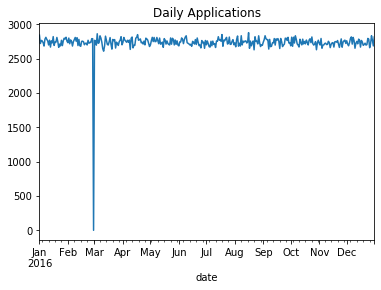

In [33]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Applications')

In [34]:
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
2016-01-06    2682
2016-01-07    2782
2016-01-08    2809
2016-01-09    2779
2016-01-10    2758
2016-01-11    2698
2016-01-12    2767
2016-01-13    2667
2016-01-14    2757
2016-01-15    2728
2016-01-16    2819
2016-01-17    2691
2016-01-18    2740
2016-01-19    2739
2016-01-20    2807
2016-01-21    2748
2016-01-22    2663
2016-01-23    2710
2016-01-24    2684
2016-01-25    2766
2016-01-26    2688
2016-01-27    2760
2016-01-28    2797
2016-01-29    2785
2016-01-30    2810
              ... 
2016-02-10    2753
2016-02-11    2803
2016-02-12    2689
2016-02-13    2779
2016-02-14    2687
2016-02-15    2678
2016-02-16    2750
2016-02-17    2753
2016-02-18    2745
2016-02-19    2701
2016-02-20    2722
2016-02-21    2723
2016-02-22    2698
2016-02-23    2766
2016-02-24    2723
2016-02-25    2734
2016-02-26    2733
2016-02-27    2789
2016-02-28    2789
2016-02-29       0
2016-03-01    2765
2016-03

In [35]:
daily_count['2016-02-29'] = daily_count['2016-02-28']
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
2016-01-06    2682
2016-01-07    2782
2016-01-08    2809
2016-01-09    2779
2016-01-10    2758
2016-01-11    2698
2016-01-12    2767
2016-01-13    2667
2016-01-14    2757
2016-01-15    2728
2016-01-16    2819
2016-01-17    2691
2016-01-18    2740
2016-01-19    2739
2016-01-20    2807
2016-01-21    2748
2016-01-22    2663
2016-01-23    2710
2016-01-24    2684
2016-01-25    2766
2016-01-26    2688
2016-01-27    2760
2016-01-28    2797
2016-01-29    2785
2016-01-30    2810
              ... 
2016-02-10    2753
2016-02-11    2803
2016-02-12    2689
2016-02-13    2779
2016-02-14    2687
2016-02-15    2678
2016-02-16    2750
2016-02-17    2753
2016-02-18    2745
2016-02-19    2701
2016-02-20    2722
2016-02-21    2723
2016-02-22    2698
2016-02-23    2766
2016-02-24    2723
2016-02-25    2734
2016-02-26    2733
2016-02-27    2789
2016-02-28    2789
2016-02-29    2789
2016-03-01    2765
2016-03

In [38]:
date = pd.DataFrame(data = daily_count)
print(date[date.apps == date.apps.max()]) 

            apps
date            
2016-08-16  2877


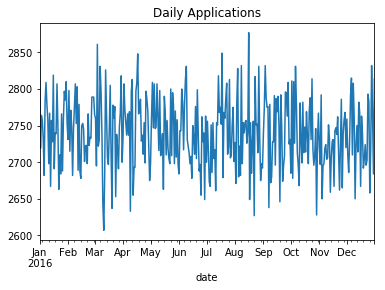

In [29]:
daily_count.plot(title = 'Daily Applications')

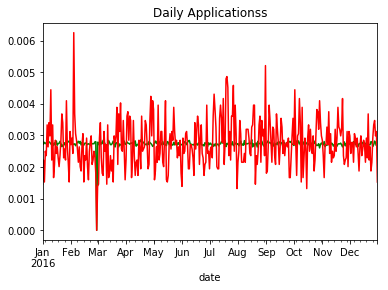

In [30]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

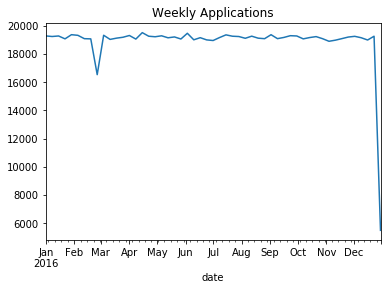

In [31]:
weekly_applications = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().apps
weekly_applications.plot(title = 'Weekly Applications')

In [32]:
weekly_applications.head(60)

date
2016-01-01    19276
2016-01-08    19235
2016-01-15    19272
2016-01-22    19068
2016-01-29    19363
2016-02-05    19318
2016-02-12    19081
2016-02-19    19067
2016-02-26    16531
2016-03-04    19323
2016-03-11    19029
2016-03-18    19118
2016-03-25    19181
2016-04-01    19306
2016-04-08    19052
2016-04-15    19508
2016-04-22    19254
2016-04-29    19217
2016-05-06    19284
2016-05-13    19143
2016-05-20    19204
2016-05-27    19057
2016-06-03    19463
2016-06-10    19000
2016-06-17    19151
2016-06-24    18994
2016-07-01    18950
2016-07-08    19160
2016-07-15    19351
2016-07-22    19255
2016-07-29    19233
2016-08-05    19108
2016-08-12    19258
2016-08-19    19116
2016-08-26    19080
2016-09-02    19362
2016-09-09    19082
2016-09-16    19169
2016-09-23    19292
2016-09-30    19272
2016-10-07    19067
2016-10-14    19160
2016-10-21    19227
2016-10-28    19080
2016-11-04    18896
2016-11-11    18975
2016-11-18    19084
2016-11-25    19196
2016-12-02    19247
2016-12-09    1

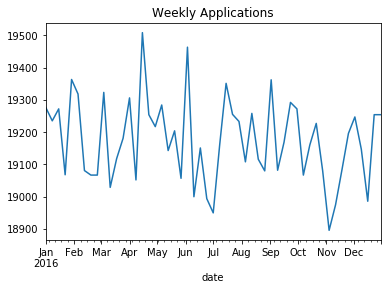

In [33]:
weekly_applications['2016-02-26'] = weekly_applications['2016-02-19']
weekly_applications['2016-12-30'] = weekly_applications['2016-12-23']
weekly_applications.plot(title = 'Weekly Applications')

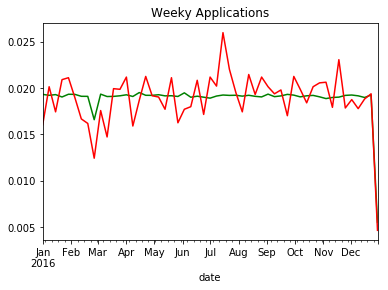

In [34]:
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [35]:
len(data['ssn']) * 100 / numrecords

100.0

In [36]:
len(data['ssn'].unique())

835819

In [37]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
165764866       34
189622157       30
295308935       30
588726212       29
163830210       29
687424410       28
826488428       25
457346566       24
77441357        24
901493436       24
407447121       24
325064391       23
258312431       23
256440495       23
406203526       23
176836012       22
108231635       22
118692079       22
907534928       22
849295926       21
727200669       21
127072438       21
205926169       21
936716159       21
365449201       21
             ...  
555709770        1
886488129        1
786443285        1
280300599        1
198509622        1
517282869        1
556508844        1
767001702        1
869786730        1
332917867        1
370179225        1
479229080        1
17829015         1
32513173         1
745542804        1
854639758        1
240178316        1
332438661        1
173059203        1
699876478        1
815223932        1
362245243   

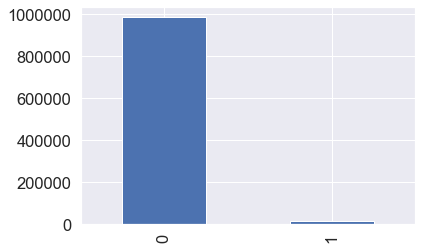

In [56]:
data['fraud_label'].value_counts().plot(kind='bar')

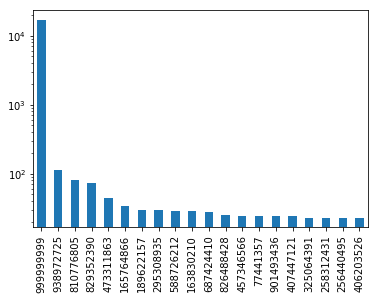

In [38]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

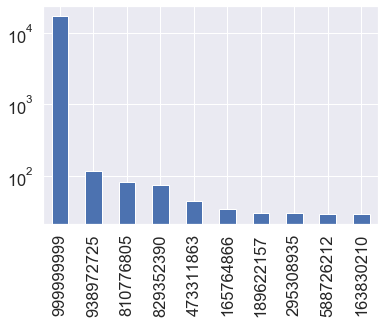

In [42]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(10).plot(kind = 'bar')
plt.yscale('log')

In [40]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2016-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,2016-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,2016-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,2016-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,2016-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,2016-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,2016-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,2016-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,2016-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [41]:
len(data['firstname']) * 100 / numrecords

100.0

In [42]:
len(data['firstname'].unique())

78136

In [43]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
EASEXMJAT     7576
SSSXUEJMS     6923
SZUASTTA      6878
EREMTZXXA     6717
EAXRRUMUX     5686
USSZMRERM     5511
MJJJZUZTE     5294
MAUJMJTU      5022
RSZXMZRSU     5006
MEERZUXXU     4966
EZTERXZRA     4716
RTMMTSZRZ     4618
UXZUMTRTR     4600
UXJAUZRMM     4580
MSRUAREMU     4145
AAASERAT      4095
RURXRTZAM     4070
MRETXAZMJ     4047
XUERJXSTU     3839
RSXTZRTS      3822
XXMZSRXMA     3745
ZZURXRJS      3712
STRTETJUZ     3637
EMTJTUTSM     3607
MSXSMXSEM     3570
             ...  
MEAXERARA        1
SRMRTREUT        1
RTTSMZMAS        1
ESSEAZJTS        1
SXXXZSXTE        1
SSRSRSZ          1
ERJJZAXTS        1
RUXURXTTR        1
ZZEXMUSR         1
SXRRAXURE        1
SSMJJEMSR        1
SXJTZJEAR        1
XZJSAEJJZ        1
RMAXAXSUE        1
ESUMRTSUE        1
SSJZXXJEU        1
MMXMERAA         1
REMXJZRMR        1
XEMZZRRX         1
STMTTMSUA        1
REAAXZRRT        1
UEREUESSJ   

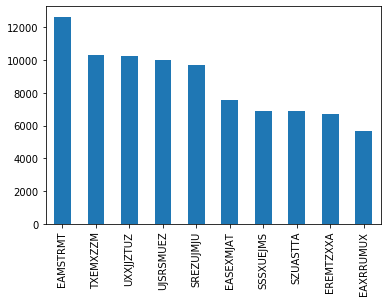

In [39]:
data['firstname'].value_counts().head(10).plot(kind='bar')

In [45]:
len(data['lastname']) * 100 / numrecords

100.0

In [46]:
len(data['lastname'].unique())

177001

In [47]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
SXZXJRJT    4340
EUSEZRAE    4173
USMATTUR    4036
ETERUXME    3762
RJURSTXJ    3575
RTZRTZAS    3559
SRTRERMJ    3259
RMRXAMX     3074
RJRARJJU    3048
SUERZXAT    3026
EUXRMR      2757
STXAAZZM    2594
ETAJXSRE    2584
EASASTEM    2535
SMTTZJJX    2527
MZRUMMJ     2507
UXJEXUJR    2471
ARUZTZM     2360
SRRTAZTX    2309
SJURETUX    2289
UMUMAEZM    2275
RMERUMUM    2056
AJUZMTM     1989
EMRSJTXE    1963
RRUXSJRT    1901
            ... 
EEAASTEX       1
SETSXJJM       1
STRURSEX       1
SAZESUUX       1
SRSXAZMS       1
SEEURJEX       1
ESTRSESM       1
RXUERSJA       1
RETETEUE       1
SARZMETT       1
UMEZSZUU       1
RTARUMRR       1
SEAXUMZU       1
UJJERASR       1
USTRJSST       1
SXESJJZE       1
RASXAEZA       1
MSSSTSS        1
UURRAXXT       1
UXJRUEJZ       1
RSUJRXEJ       1
EXZAURAZ       1
UAASETS        1
RJTJAXUM       1
RURMUXAT       1
EUSRTJTE       1
EEXUXSUE       1
RARMJXAM      

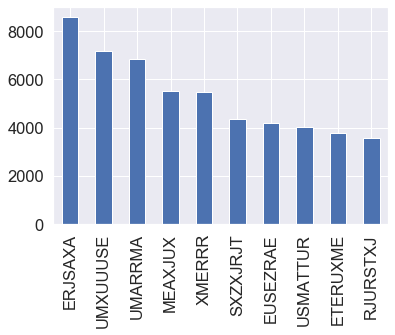

In [44]:
data['lastname'].value_counts().head(10).plot(kind='bar')

In [49]:
len(data['address']) * 100 / numrecords

100.0

In [50]:
len(data['address'].unique())

828774

In [51]:
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
426 XUAXZ BLVD       57
3545 ARMA ST         44
606 EZZAU WY         44
4530 ETSMX WY        42
4292 RUSMM LN        41
9693 ERJZA LN        40
3142 MZZE WY         36
6637 UESAX LN        35
5600 UETAR AVE       35
1425 UAATX ST        35
4479 RMEAZ PL        34
2611 AXXS CT         33
9777 RMJJU WY        32
2026 UZJTX CT        31
8966 UAJER AVE       31
3253 EMMZX LN        30
7651 RRMTE WY        30
8198 UMJAJ DR        30
1849 XUXRE DR        30
2105 RMTMA ST        30
1693 RJTTT CT        30
7157 UEMXE PL        29
1569 XURRA RD        29
7017 SJJUZ WY        29
7793 XASZE LN        28
                   ... 
2358 XTZRJ AVE        1
3181 UXXXT PL         1
3938 STMUS RD         1
3126 UZXTX ST         1
9796 REUEX LN         1
4305 RXAM BLVD        1
2333 SZMRU ST         1
4992 SUASM RD         1
7709 XMZRX WY         1
3490 SAXEU DR         1
4706 SZETS LN   

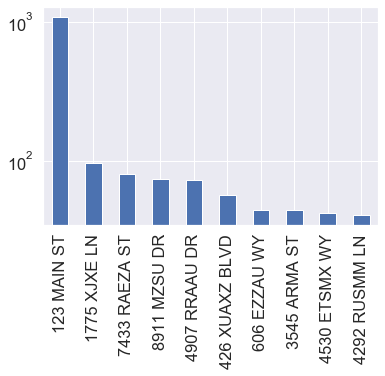

In [48]:
data['address'].value_counts().head(10).plot(kind='bar',logy=True)

In [53]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2016-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2016-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2016-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2016-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2016-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2016-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2016-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2016-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2016-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2016-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [54]:
len(data['zip5']) * 100 / numrecords

100.0

In [55]:
len(data['zip5'].unique())

26370

In [56]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
86500    438
12700    436
1362     434
59695    432
52317    432
14455    431
64597    431
11848    428
34031    425
84983    419
80692    408
94992    406
47208    399
27132    397
94887    397
56155    385
13053    378
14200    375
68992    374
10664    373
50780    372
66902    371
9298     371
72192    370
90755    368
        ... 
37335      1
47475      1
31922      1
25068      1
93289      1
11392      1
88784      1
50341      1
86737      1
36098      1
11841      1
18797      1
15427      1
51581      1
97276      1
82131      1
74336      1
5928       1
35413      1
19699      1
52163      1
41653      1
37858      1
63579      1
40169      1
37527      1
54496      1
73481      1
52531      1
69618      1
Name: zip5, Length: 26370, dtype: int64

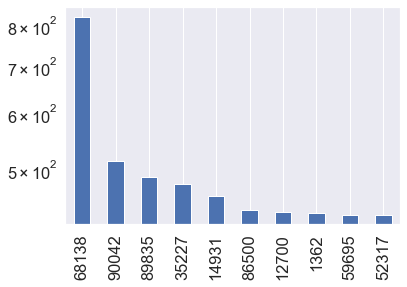

In [49]:
data['zip5'].value_counts().head(10).plot(kind='bar',logy=True)

In [58]:
len(data['dob']) * 100 / numrecords

100.0

In [59]:
len(data['dob'].unique())

42673

In [60]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
20090127       280
19460901       135
19591208       126
19280611       120
19670215       102
19360908        81
19570630        69
20010904        69
20151012        67
20020315        65
19860425        56
19551013        55
19290921        54
19400301        52
19240409        52
19670629        50
19530920        50
19021213        50
20141117        49
19680820        49
19731101        48
19360713        48
19830419        47
20010907        47
19421110        47
             ...  
19851220         6
19741208         6
19700314         6
19611222         6
19970723         6
19350608         6
20060218         6
19110205         6
19690416         6
19850410         6
19061018         6
19910531         6
19840913         6
19611107         6
19210701         6
19521206         6
19280918         6
19481018         6
19860313         5
19330705         5
19960904         5
20030515    

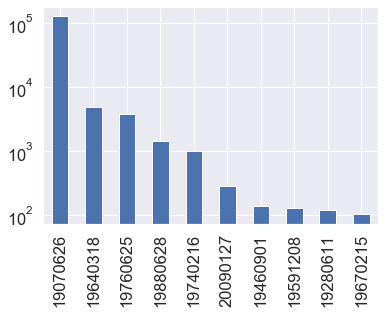

In [50]:
data['dob'].value_counts().head(10).plot(kind='bar',logy=True)

In [62]:
len(data['homephone']) * 100 / numrecords

100.0

In [63]:
len(data['homephone'].unique())

28244

In [64]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
2669445638      172
6637507363      169
8629049955      139
3364980740      110
1324008228      108
6845279110      108
8880326532      107
2841944187      107
5014272561      106
8477710704      106
6773573704      105
3417174496      104
6538326086      104
7460887672      103
1133829511      103
1721670786      103
5753452592      100
6051690361       99
4701588077       99
7304949596       98
1252191250       98
7279614471       98
7666418262       96
4236591930       96
5930087830       96
              ...  
3152497907        1
4173896871        1
7909661647        1
1487242890        1
7813229119        1
2957613865        1
6975375821        1
4382854075        1
2723400856        1
8157246551        1
6773922191        1
5203848044        1
6361389271        1
5150223351        1
8507465472        1
3850395065        1
3828148714        1
1763757379        1
6724376073        1


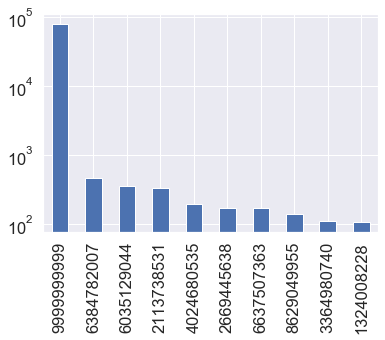

In [51]:
data['homephone'].value_counts().head(10).plot(kind='bar',logy=True)

In [66]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
17,18,2016-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0
26,27,2016-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0
60,61,2016-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
145,146,2016-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0
149,150,2016-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0
178,179,2016-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0
179,180,2016-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,19070626,9999999999,0
180,181,2016-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0
200,201,2016-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,19070626,9999999999,0


In [67]:
print('duration: ', pd.datetime.now()-start_time)

duration:  0:00:17.290092


In [16]:
data['ssn'] = data['ssn'].astype(str)
data['firstname'] = data['firstname'].astype(str)
data['lastname'] = data['lastname'].astype(str)
data['address'] = data['address'].astype(str)
data['zip5'] = data['zip5'].astype(str)
data['dob'] = data['dob'].astype(str)
data['homephone'] = data['homephone'].astype(str)

In [17]:
data['name'] = (data['firstname'])+(data['lastname'])
data['fulladdress'] = (data['address'])+(data['zip5'])